# Machine Learning:
- __LOF Algorithm for Anomaly Detection.__
- Local Outlier Factor for Anomaly Detection Algorithm.
- Unsupervised Machine Learning.

In [35]:
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "8"

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

## Load Data:

In [37]:
df = pd.read_csv("thyroid_dataset.csv")

In [38]:
df.head()

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Outlier_label
0,0.45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,61.0,6.0,23.0,87.0,26.0,o
1,0.61,0,0,0,0,1,0,0,0,0,...,0,0,0,0,29.0,15.0,61.0,96.0,64.0,o
2,0.16,0,1,0,0,0,0,0,0,0,...,0,1,0,0,29.0,19.0,58.0,103.0,56.0,o
3,0.85,0,0,0,0,0,0,0,0,0,...,0,0,0,0,114.0,3.0,24.0,61.0,39.0,o
4,0.75,1,0,0,0,0,0,0,0,0,...,0,0,0,0,49.0,3.0,5.0,116.0,4.0,o


In [39]:
df.shape

(6916, 22)

In [40]:
X = df.drop("Outlier_label", axis = 1)
y = df["Outlier_label"]

## Scalling Data:

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Applying Isolation Forest Algorithm:
- Model Creation.

In [42]:
clf = IsolationForest(
    n_estimators = 200,
    contamination = 0.036,
    random_state = 42
)

clf

IsolationForest(contamination=0.036, n_estimators=200, random_state=42)

## Predectiong Data:

In [43]:
labels = clf.fit_predict(X_scaled)
labels

array([ 1,  1, -1, ...,  1,  1,  1])

## Visualizeing Data using PCA:

In [44]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

Text(0.5, 1.0, 'Isolation Forest for Anomaly Detection Algorithm.')

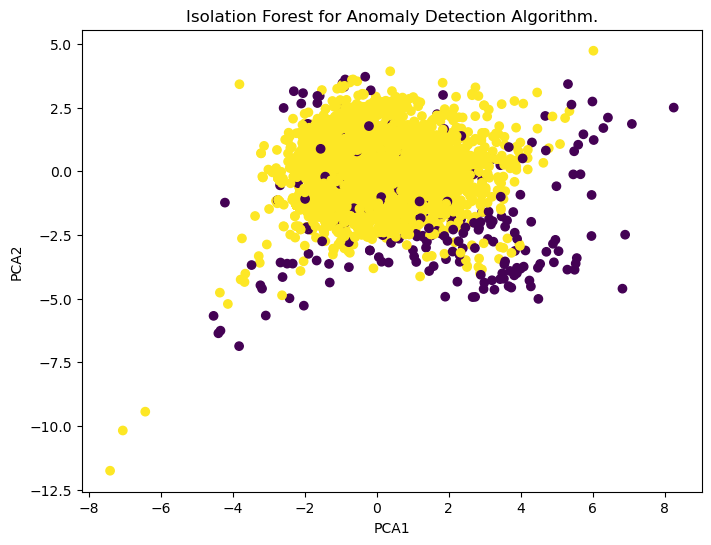

In [45]:
plt.figure(figsize  = (8, 6))
plt.scatter(X_pca[:, 0], X_pca[:,1], c = labels)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Isolation Forest for Anomaly Detection Algorithm.")

# Number of Outliers & Normal Count:

In [46]:
n_outliers = np.sum(labels == -1)
n_normal = np.sum(labels == 1)

print(f"Number of outliers data are: {n_outliers}")
print(f"Number of non-outliers data are: {n_normal}")

Number of outliers data are: 249
Number of non-outliers data are: 6667


# LOF Algorithm for Anomaly Detection.
- Local Outlier Factor for Anomaly Detection Algorithm.

In [47]:
neighbors = LocalOutlierFactor(contamination = 0.036)

## Making Predections:

In [48]:
labels = neighbors.fit_predict(X_scaled)

## Visualizeing Data using PCA:

In [49]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

Text(0.5, 1.0, 'Isolation Forest for Anomaly Detection Algorithm.')

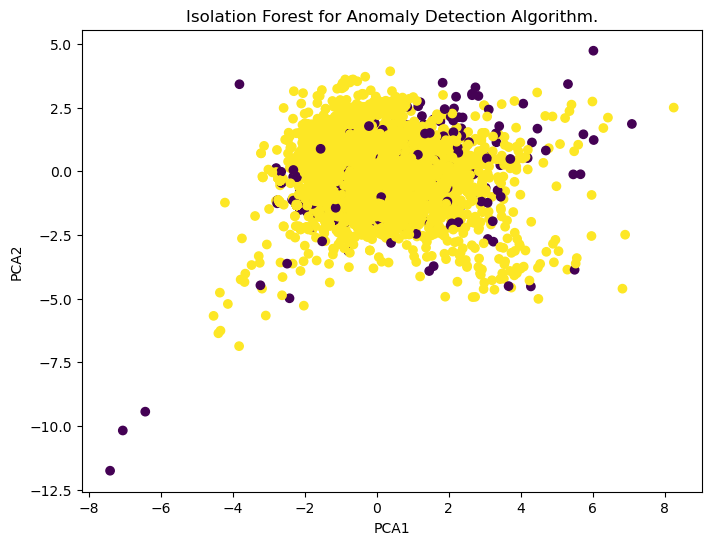

In [50]:
plt.figure(figsize  = (8, 6))
plt.scatter(X_pca[:, 0], X_pca[:,1], c = labels)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Isolation Forest for Anomaly Detection Algorithm.")

# Number of Outliers & Normal Count:

In [51]:
n_outliers = np.sum(labels == -1)
n_normal = np.sum(labels == 1)

print(f"Number of outliers data are: {n_outliers}")
print(f"Number of non-outliers data are: {n_normal}")

Number of outliers data are: 249
Number of non-outliers data are: 6667
